# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
os.chdir(r"C:\Users\Alex\Documents\data")
data_path = os.getcwd()

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_path): 
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_path)

Found 305 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
print(batch[0])
print(type(batch[1]))

[[[[5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   ...
   [5.11406250e+01 4.84296875e+01 4.70000000e+01]
   [5.27421875e+01 4.72578125e+01 4.84843750e+01]
   [5.30000000e+01 4.70000000e+01 4.90000000e+01]]

  [[5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   ...
   [5.11406250e+01 4.84296875e+01 4.70000000e+01]
   [5.27421875e+01 4.72578125e+01 4.84843750e+01]
   [5.30000000e+01 4.70000000e+01 4.90000000e+01]]

  [[5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   [5.00000000e+01 5.00000000e+01 5.20000000e+01]
   ...
   [5.11406250e+01 4.84296875e+01 4.70000000e+01]
   [5.26378174e+01 4.73621826e+01 4.84843750e+01]
   [5.28593750e+01 4.71406250e+01 4.90000000e+01]]

  ...

  [[9.91406250e+01 1.59140625e+02 9.56958008e+00]
   [9.91043701e+

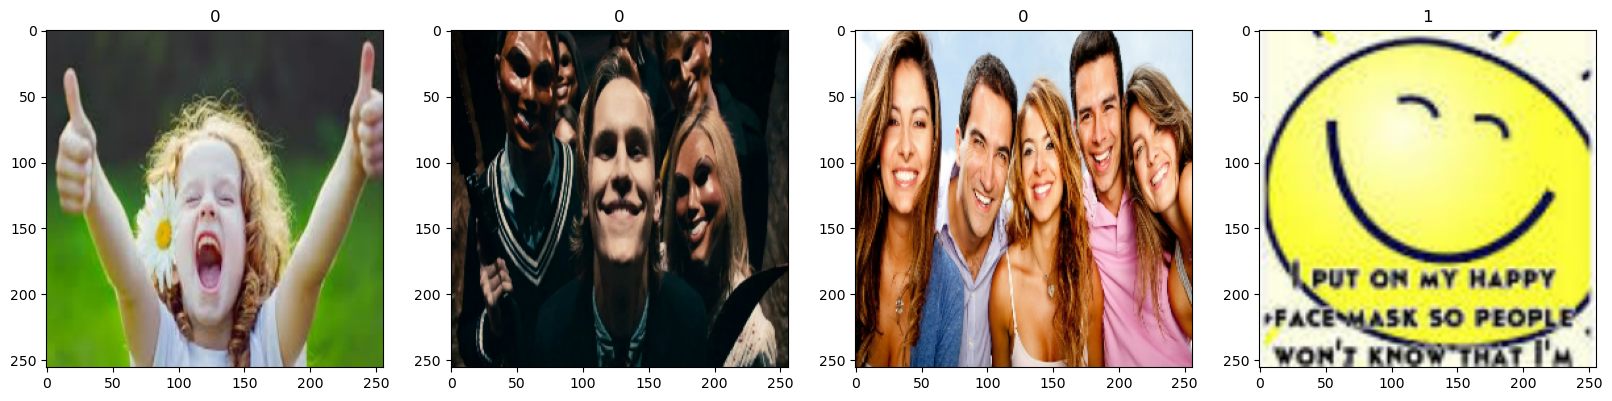

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
data.as_numpy_iterator().next()

(array([[[[0.8627451 , 0.8666667 , 0.84313726],
          [0.87058824, 0.8745098 , 0.8509804 ],
          [0.87058824, 0.8745098 , 0.8509804 ],
          ...,
          [0.83137256, 0.83137256, 0.83137256],
          [0.83137256, 0.83137256, 0.83137256],
          [0.83137256, 0.83137256, 0.83137256]],
 
         [[0.86890316, 0.8728247 , 0.8492953 ],
          [0.87058824, 0.8745098 , 0.8509804 ],
          [0.87058824, 0.8745098 , 0.8509804 ],
          ...,
          [0.8344516 , 0.8344516 , 0.8344516 ],
          [0.83137256, 0.83137256, 0.83137256],
          [0.83137256, 0.83137256, 0.83137256]],
 
         [[0.87058824, 0.8745098 , 0.8509804 ],
          [0.87058824, 0.8745098 , 0.8509804 ],
          [0.87058824, 0.8745098 , 0.8509804 ],
          ...,
          [0.8352941 , 0.8352941 , 0.8352941 ],
          [0.83137256, 0.83137256, 0.83137256],
          [0.83137256, 0.83137256, 0.83137256]],
 
         ...,
 
         [[0.84313726, 0.83137256, 0.79607844],
          [0.84313

# 5. Split Data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
test_size

1

In [15]:
train_size

7

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [17]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 922ms/step - loss: 0.7730 - accuracy: 0.5179 - val_loss: 0.6546 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 7s 857ms/step - loss: 0.6403 - accuracy: 0.5491 - val_loss: 0.5949 - val_accuracy: 0.7969
Epoch 3/20
7/7 [==============================] - 7s 863ms/step - loss: 0.6118 - accuracy: 0.7634 - val_loss: 0.5272 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 8s 926ms/step - loss: 0.5708 - accuracy: 0.7143 - val_loss: 0.6004 - val_accuracy: 0.7031
Epoch 5/20
7/7 [==============================] - 7s 896ms/step - loss: 0.5190 - accuracy: 0.7679 - val_loss: 0.5101 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 7s 910ms/step - loss: 0.4589 - accuracy: 0.8304 - val_loss: 0.3869 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 7s 891ms/step - loss: 0.3122 - accuracy: 0.8929 - val_loss: 0.2612 - val_accuracy: 0.8906
Epoch 8/20
7/7 [====

# 8. Plot Performance

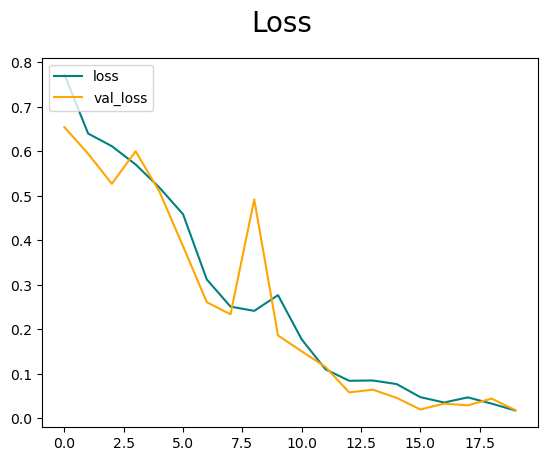

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

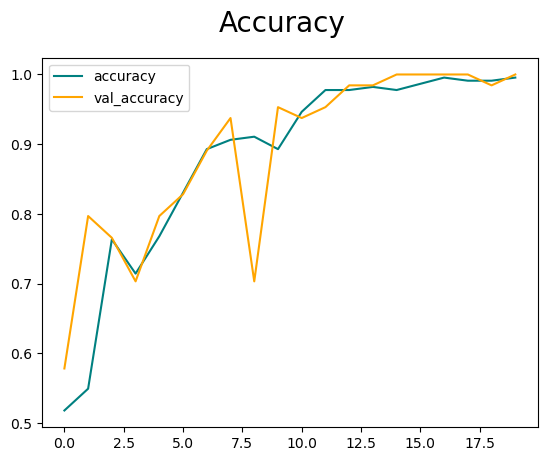

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
i = 0
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    print(yhat)


1/1 [==============================] - 0s 167ms/step
[[9.9992353e-01]
 [9.9983716e-01]
 [9.9862009e-01]
 [9.9990028e-01]
 [8.2554758e-02]
 [9.9885631e-01]
 [9.9222296e-01]
 [1.0285310e-07]
 [1.7455402e-03]
 [2.6364631e-05]
 [9.9811232e-01]
 [9.9995321e-01]
 [9.9672365e-01]
 [9.9928892e-01]
 [9.9958491e-01]
 [2.9741134e-09]
 [3.5864580e-04]]


In [36]:
pre.update_state(y, yhat)

In [37]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

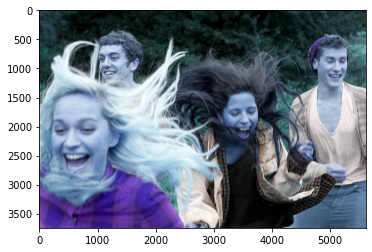

In [39]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

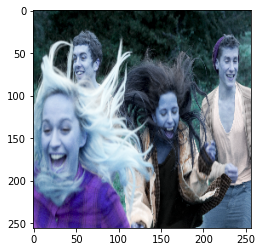

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
yhat

array([[0.01972741]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)